<a href="https://www.kaggle.com/code/jaskarandhillon1609/supervised-learning-techniques?scriptVersionId=210540793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Experiment 1: Handling Missing Data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/supervised-learning-datasets/data.csv')

# Identify columns with missing values and calculate the percentage of missing data
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Replace missing values in numerical columns with their respective mean
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Replace missing values in categorical columns with the most frequent value
for column in df.select_dtypes(include=['object']).columns:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

# Drop rows with more than 50% missing values
df.dropna(thresh=len(df.columns) * 0.5, inplace=True)

# Verify that all missing data issues have been resolved
print(df.isnull().sum())

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0.0
dtype: float64
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64


Experiment 2: Removing Duplicates

In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/kaggle/input/supervised-learning-datasets/data.csv')

# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
print(df[duplicates].head())

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)
print(df_cleaned.head())

Number of duplicate rows: 937
   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
4   7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
5   8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
7    7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
8   6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
20  6.2;0.66;0.48;1.2;0.029;29;75;0.9892;3.33;0.39...                                                              

Experiment 3: Data Transformation and Normalization

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Check the first few rows of the dataset
print(df.head())

# Standardize numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Normalize numerical columns to range between 0 and 1
min_max_scaler = MinMaxScaler()
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# The Iris dataset does not have a 'total sulfur dioxide' column, so this part can be removed or modified.
# If you want to apply log transformation, you can apply it to a valid numerical column.
# For example, applying it to the first numerical column (sepal length):
df[df.columns[0]] = np.log(df[df.columns[0]] + 1)  # Adding 1 to avoid log(0)

# Convert a categorical column into dummy/one-hot encoded variables
# The Iris dataset does not have categorical variables, so this step may not apply directly.
# However, if you had a categorical variable, you could do:
# df = pd.get_dummies(df, columns=['categorical_column'])

# Display the transformed dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.200671          0.625000           0.067797          0.041667
1           0.154151          0.416667           0.067797          0.041667
2           0.105361          0.500000           0.050847          0.041667
3           0.080043          0.458333           0.084746          0.041667
4           0.177681          0.666667           0.067797          0.041667


Experiment 4: Detecting and Handling Outliers

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

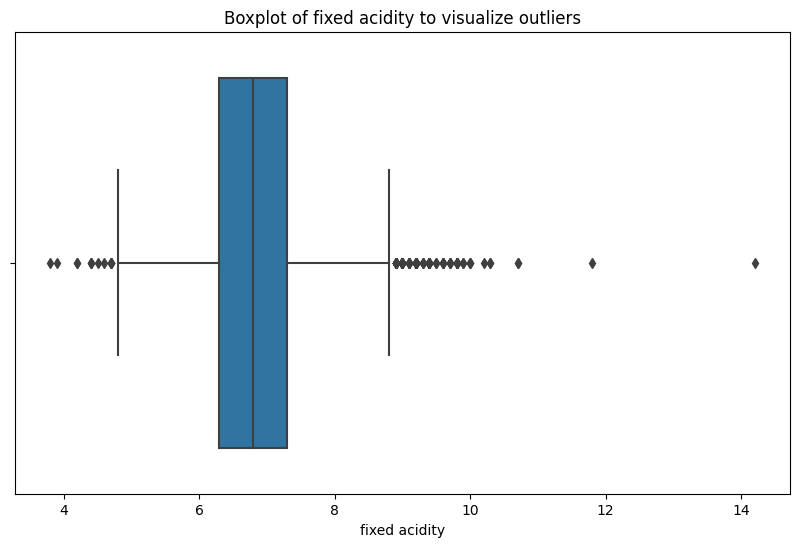

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine Quality dataset
df = pd.read_csv('/kaggle/input/supervised-learning-datasets/data.csv', delimiter=';')  # Update with your actual path

# Display the first few rows and the columns to understand the data
print(df.head())
print(df.columns.tolist())  # Print the list of column names


# Choose the correct numerical column to analyze for outliers
column_name = 'fixed acidity'  # Ensure this matches the column name exactly

# Check if the column exists in the DataFrame
if column_name in df.columns:
    # Identify outliers using IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print("Outliers:")
    print(outliers)

    # Visualize outliers using a boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name} to visualize outliers')
    plt.show()

    # Replace outliers with the 5th and 95th percentile values
    df[column_name] = np.where(df[column_name] < lower_bound, df[column_name].quantile(0.05), df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, df[column_name].quantile(0.95), df[column_name])

    # Display the transformed dataset
    print(df.head())
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")

Experiment 5: Building a Simple Linear Regression Model

['TV', 'Radio', 'Newspaper', 'Sales']


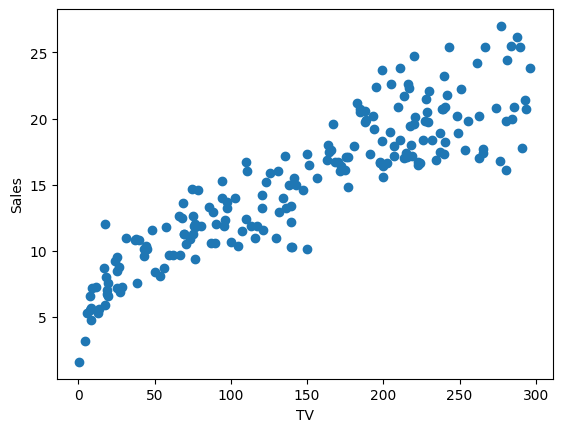

MSE: 5.2177438977951285, R-squared: 0.8121757029987414


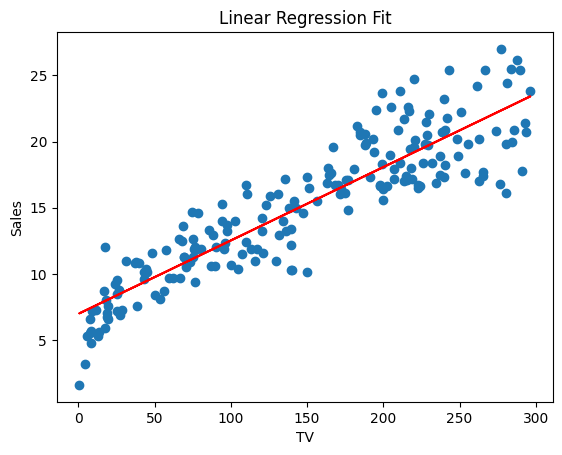

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/kaggle/input/supervised-learning-datasets/ad.csv')
print(df.columns.tolist())
df.head()
# Define dependent (Y) and independent (X) variables
X = df[['TV']]
Y = df['Sales']

# Plot the relationship
plt.scatter(X, Y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
print(f'MSE: {mse}, R-squared: {r2}')

# Visualize the regression line
plt .plot(X, Y, 'o')
plt.plot(X, Y_pred, color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')
plt.show()

Experiment 6: Multiple Linear Regression

In [6]:
import pandas as pd

# Assuming 'auto.csv' contains string data in the specified columns
df = pd.read_csv('/kaggle/input/supervised-learning-datasets/auto.csv')

import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric, forcing errors to NaN
df['displacement'] = pd.to_numeric(df['displacement'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

# Optionally drop rows with NaN values
df.dropna(subset=['displacement', 'horsepower', 'weight'], inplace=True)

# Now you can proceed with defining X and Y
X = df[['displacement', 'horsepower', 'weight']]
Y = df['mpg']  # Ensure 'mpg' is also numeric and valid

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit a multiple linear regression model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 18.01391154054201
R-squared: 0.6470668946730964


Experiment 7: Binary Logistic Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('/kaggle/input/supervised-learning-datasets/diabetes.csv')

# Define features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.7467532467532467, Precision: 0.6379310344827587, Recall: 0.6727272727272727, F1 Score: 0.6548672566371682


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Experiment 8: Implementing k-NN for Classification

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target  # Add the target variable

# Define features and target variable
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize the features
X = (X - X.mean()) / X.std()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a k-NN classifier
k_values = [1, 3, 5, 10]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k={k}: {accuracy}')

Accuracy for k=1: 0.9666666666666667
Accuracy for k=3: 1.0
Accuracy for k=5: 1.0
Accuracy for k=10: 1.0


Experiment 9: SVM for Binary Classification

In [9]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target  # Add the target variable


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with linear kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Train SVM with RBF kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)

# Evaluate the models
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy (Linear Kernel): {accuracy_linear}, Accuracy (RBF Kernel): {accuracy_rbf}')

Accuracy (Linear Kernel): 0.9666666666666667, Accuracy (RBF Kernel): 1.0


Experiment 10: Dimensionality Reduction Using PCA

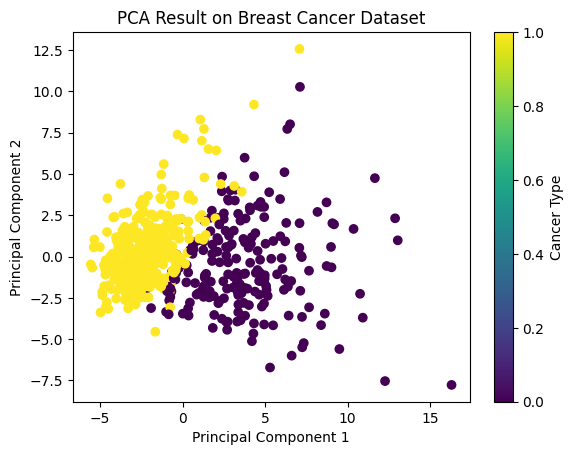

Explained variance by each principal component: [0.44272026 0.18971182]


In [10]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardize the data
X_standardized = (df - df.mean()) / df.std()

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_standardized)

# Visualize the results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result on Breast Cancer Dataset')
plt.colorbar(label='Cancer Type')
plt.show()

# Analyze the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each principal component: {explained_variance}')